In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)
          

geraldton au
miri my
altagracia de orituco ve
mitsamiouli km
mahibadhoo mv
neftcala az
provideniya ru
punta arenas cl
sibolga id
lakatoro vu
mar del plata ar
praya id
nizhneyansk ru
yellowknife ca
severo-kurilsk ru
hobart au
muros es
chuy uy
phan thiet vn
murdochville ca
imbituba br
hermanus za
paamiut gl
mys shmidta ru
tuktoyaktuk ca
zhezkazgan kz
clyde river ca
jamestown sh
punta arenas cl
karaul ru
vaini to
pakokku mm
saskylakh ru
sigli id
jorpeland no
luba gq
carnarvon au
vaini to
desaguadero pe
georgetown sh
arraial do cabo br
rikitea pf
nikolskoye ru
buta cd
san vicente ph
rikitea pf
rikitea pf
ushuaia ar
tuktoyaktuk ca
tuktoyaktuk ca
mataura pf
joao pinheiro br
ancud cl
korla cn
belushya guba ru
rikitea pf
victoria sc
albany au
duki pk
kavaratti in
celestun mx
atuona pf
cidreira br
ushuaia ar
port alfred za
puerto suarez bo
pangnirtung ca
puerto ayora ec
geraldton ca
tortoli it
lebu cl
vostok ru
rungata ki
ushuaia ar
cape town za
guerrero negro mx
erzin ru
victoria sc
butaritari

cape town za
westport ie
aklavik ca
sept-iles ca
colac au
ushuaia ar
rikitea pf
punta arenas cl
atuona pf
damara cf
broome au
barrow us
srednekolymsk ru
bredasdorp za
laguna br
ayagoz kz
pevek ru
hithadhoo mv
punta arenas cl
luderitz na
casa nova br
barrow us
nemuro jp
rikitea pf
barentsburg sj
oruro bo
puerto ayora ec
yellowknife ca
tlahualilo mx
southbridge nz
acapulco mx
port elizabeth za
fonte boa br
georgetown sh
yellowknife ca
lompoc us
puerto ayora ec
faya td
punta arenas cl
saskylakh ru
barrow us
sochi ru
saint-philippe re
rikitea pf
havoysund no
bakchar ru
carlyle ca
upernavik gl
iqaluit ca
castro cl
busselton au
norman wells ca
new norfolk au
kloulklubed pw
nizhneyansk ru
busselton au
tucson us
saint-philippe re
attawapiskat ca
saleaula ws
hermanus za
mar del plata ar
amderma ru
rikitea pf
punta arenas cl
beringovskiy ru
thinadhoo mv
hobart au
clyde river ca
kapaa us
iquique cl
gannan cn
rikitea pf
kloulklubed pw
ponta do sol cv
hobart au
ancud cl
punta arenas cl
berlevag no


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | miri
Processing Record 3 of Set 1 | altagracia de orituco
Processing Record 4 of Set 1 | mitsamiouli
Processing Record 5 of Set 1 | mahibadhoo
Processing Record 6 of Set 1 | neftcala
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | sibolga
Processing Record 10 of Set 1 | lakatoro
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | praya
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | muros
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | phan thiet
Processing Record 20 of Set 1 | murdochville
Processing Record 21 of Set 1 | imbituba
Processing Record 22 of Set 

Processing Record 35 of Set 4 | henties bay
Processing Record 36 of Set 4 | pevek
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | nguiu
City not found. Skipping...
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | tasbuget
City not found. Skipping...
Processing Record 41 of Set 4 | lakselv
Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | fuerte olimpo
Processing Record 44 of Set 4 | scarborough
Processing Record 45 of Set 4 | mananara
Processing Record 46 of Set 4 | yumen
Processing Record 47 of Set 4 | mataram
Processing Record 48 of Set 4 | humberto de campos
Processing Record 49 of Set 4 | peniche
Processing Record 50 of Set 4 | gwadar
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | beira
Processing Record 4 of Set 5 | chipinge
Processing Record 5 of Set 5 | verkhnevilyuysk
Processing Record 6 of Set 5 | bababe
Ci

Processing Record 22 of Set 8 | visavadar
Processing Record 23 of Set 8 | edd
Processing Record 24 of Set 8 | chapais
Processing Record 25 of Set 8 | usogorsk
Processing Record 26 of Set 8 | lorengau
Processing Record 27 of Set 8 | kloulklubed
Processing Record 28 of Set 8 | turukhansk
Processing Record 29 of Set 8 | mount gambier
Processing Record 30 of Set 8 | lasa
Processing Record 31 of Set 8 | talnakh
Processing Record 32 of Set 8 | augustow
Processing Record 33 of Set 8 | kankakee
Processing Record 34 of Set 8 | goba
Processing Record 35 of Set 8 | talawdi
City not found. Skipping...
Processing Record 36 of Set 8 | akoupe
Processing Record 37 of Set 8 | riyadh
Processing Record 38 of Set 8 | samarai
Processing Record 39 of Set 8 | teguise
Processing Record 40 of Set 8 | severnyy
Processing Record 41 of Set 8 | cap malheureux
Processing Record 42 of Set 8 | balaipungut
Processing Record 43 of Set 8 | tigzirt
Processing Record 44 of Set 8 | janakkala
Processing Record 45 of Set 8 |

Processing Record 9 of Set 12 | dunedin
Processing Record 10 of Set 12 | juazeiro
Processing Record 11 of Set 12 | helong
Processing Record 12 of Set 12 | sfantu gheorghe
Processing Record 13 of Set 12 | roma
Processing Record 14 of Set 12 | pyay
Processing Record 15 of Set 12 | bubaque
Processing Record 16 of Set 12 | srandakan
Processing Record 17 of Set 12 | clinton
Processing Record 18 of Set 12 | dembi dolo
Processing Record 19 of Set 12 | lolua
City not found. Skipping...
Processing Record 20 of Set 12 | batagay
Processing Record 21 of Set 12 | rybinsk
Processing Record 22 of Set 12 | qasigiannguit
Processing Record 23 of Set 12 | astipalaia
City not found. Skipping...
Processing Record 24 of Set 12 | ambon
Processing Record 25 of Set 12 | aurillac
Processing Record 26 of Set 12 | blagoveshchenka
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | kifri
Processing Record 30 of Set 12 | moroni
Processing Record 31 

In [13]:
print(len(city_data))

577


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,64.81,94,0,8.05,AU,2022-04-14 15:08:13
1,Miri,4.4148,114.0089,78.58,84,23,2.66,MY,2022-04-14 15:11:47
2,Altagracia De Orituco,9.8601,-66.3814,89.08,40,27,8.55,VE,2022-04-14 15:11:48
3,Mitsamiouli,-11.3847,43.2844,82.87,76,13,9.08,KM,2022-04-14 15:11:48
4,Mahibadhoo,3.7833,72.9667,85.21,71,100,9.89,MV,2022-04-14 15:11:48
5,Neftcala,39.3742,49.2472,56.97,61,87,12.06,AZ,2022-04-14 15:11:49
6,Provideniya,64.3833,-173.3000,29.43,96,100,8.97,RU,2022-04-14 15:11:49
7,Punta Arenas,-53.1500,-70.9167,55.51,62,40,25.32,CL,2022-04-14 15:11:49
8,Sibolga,1.7427,98.7792,78.08,89,100,2.39,ID,2022-04-14 15:11:50
9,Lakatoro,-16.0999,167.4164,80.51,81,15,7.38,VU,2022-04-14 15:11:50


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [18]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,AU,2022-04-14 15:08:13,-28.7667,114.6000,64.81,94,0,8.05
1,Miri,MY,2022-04-14 15:11:47,4.4148,114.0089,78.58,84,23,2.66
2,Altagracia De Orituco,VE,2022-04-14 15:11:48,9.8601,-66.3814,89.08,40,27,8.55
3,Mitsamiouli,KM,2022-04-14 15:11:48,-11.3847,43.2844,82.87,76,13,9.08
4,Mahibadhoo,MV,2022-04-14 15:11:48,3.7833,72.9667,85.21,71,100,9.89
5,Neftcala,AZ,2022-04-14 15:11:49,39.3742,49.2472,56.97,61,87,12.06
6,Provideniya,RU,2022-04-14 15:11:49,64.3833,-173.3000,29.43,96,100,8.97
7,Punta Arenas,CL,2022-04-14 15:11:49,-53.1500,-70.9167,55.51,62,40,25.32
8,Sibolga,ID,2022-04-14 15:11:50,1.7427,98.7792,78.08,89,100,2.39
9,Lakatoro,VU,2022-04-14 15:11:50,-16.0999,167.4164,80.51,81,15,7.38


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

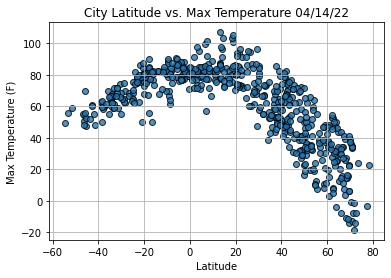

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

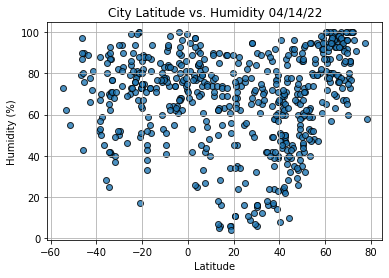

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

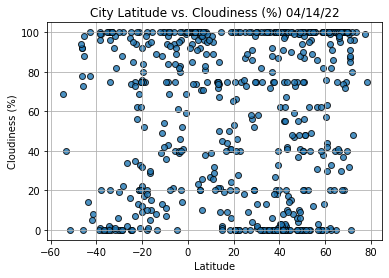

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

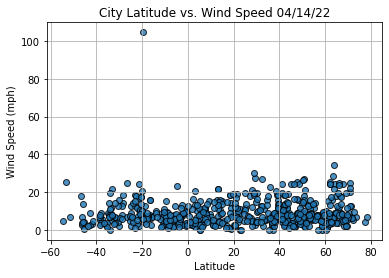

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Miri,MY,2022-04-14 15:11:47,4.4148,114.0089,78.58,84,23,2.66
2,Altagracia De Orituco,VE,2022-04-14 15:11:48,9.8601,-66.3814,89.08,40,27,8.55
4,Mahibadhoo,MV,2022-04-14 15:11:48,3.7833,72.9667,85.21,71,100,9.89
5,Neftcala,AZ,2022-04-14 15:11:49,39.3742,49.2472,56.97,61,87,12.06
6,Provideniya,RU,2022-04-14 15:11:49,64.3833,-173.3000,29.43,96,100,8.97


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

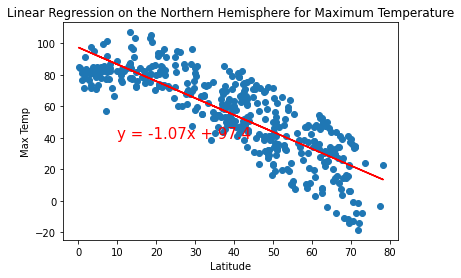

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

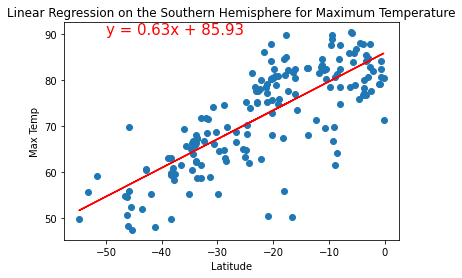

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

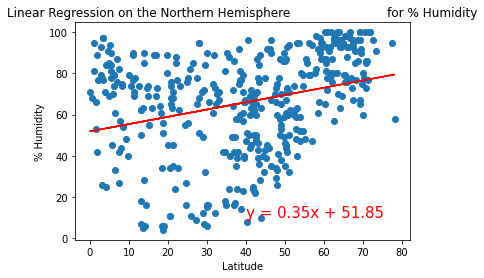

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

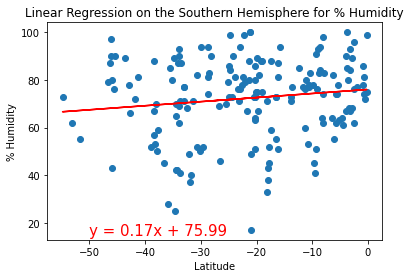

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50, 15))

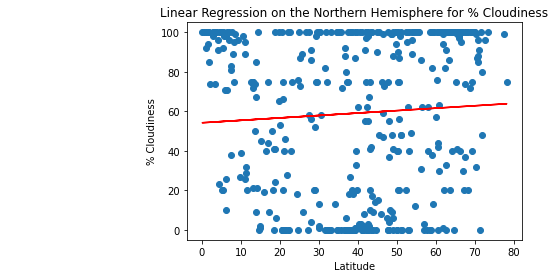

In [42]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))

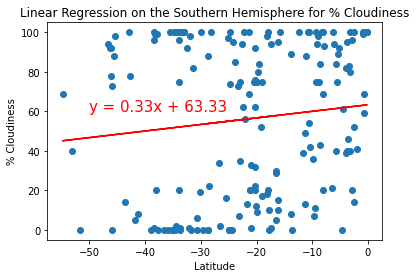

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

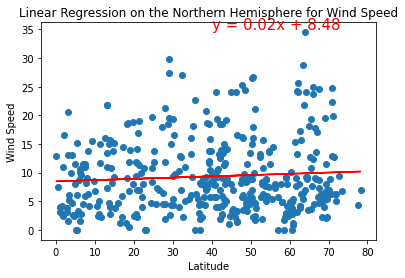

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

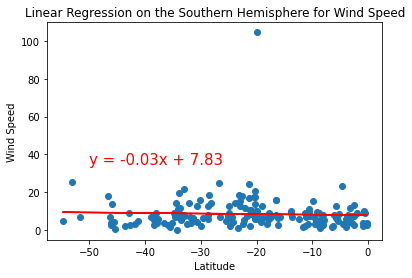

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))